In [13]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/postings.csv")
print(df.head())
print(df.columns)

Path to dataset files: C:\Users\youssef\.cache\kagglehub\datasets\arshkon\linkedin-job-postings\versions\13
     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                     NaN   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                     NaN   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  S

In [19]:
it_keywords = ['software', 'data', 'engineer', 'it', 'developer', 'analyst', 'tech', 'programmer', 'cloud', 'cyber', 'ai', 'machine learning']
df_it = df[df['title'].str.contains('|'.join(it_keywords), case=False, na=False)]
print(f"IT jobs dataset size: {df_it.shape}")

IT jobs dataset size: (48343, 31)


C:\Users\youssef\AppData\Local\Temp\ipykernel_16464\674173708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles_raw.index, y=top_titles_raw.values, palette="tab10")


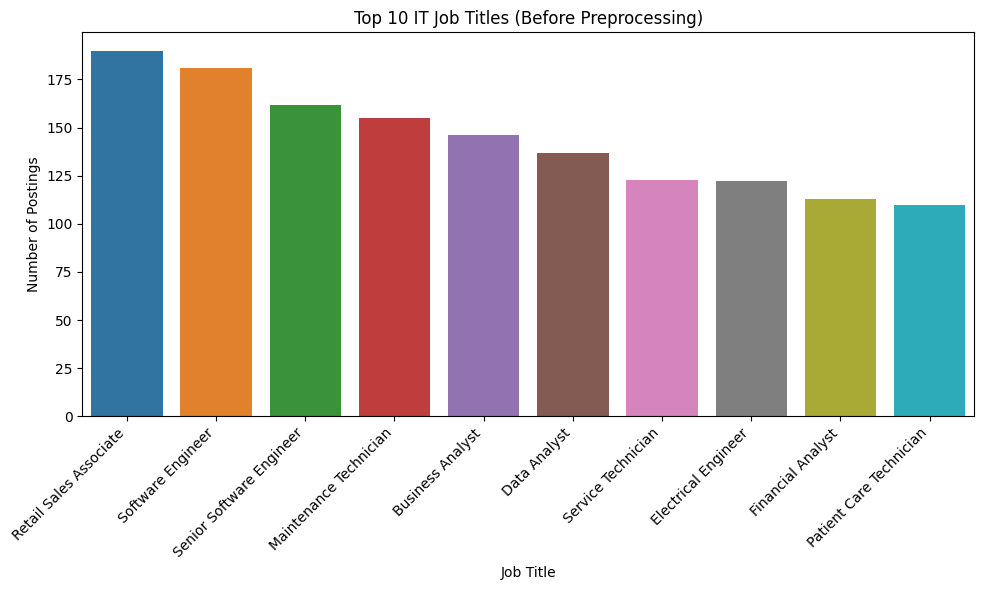

In [20]:
plt.figure(figsize=(10, 6))
top_titles_raw = df_it['title'].value_counts().head(10)
sns.barplot(x=top_titles_raw.index, y=top_titles_raw.values, palette="tab10")
plt.title("Top 10 IT Job Titles (Before Preprocessing)")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

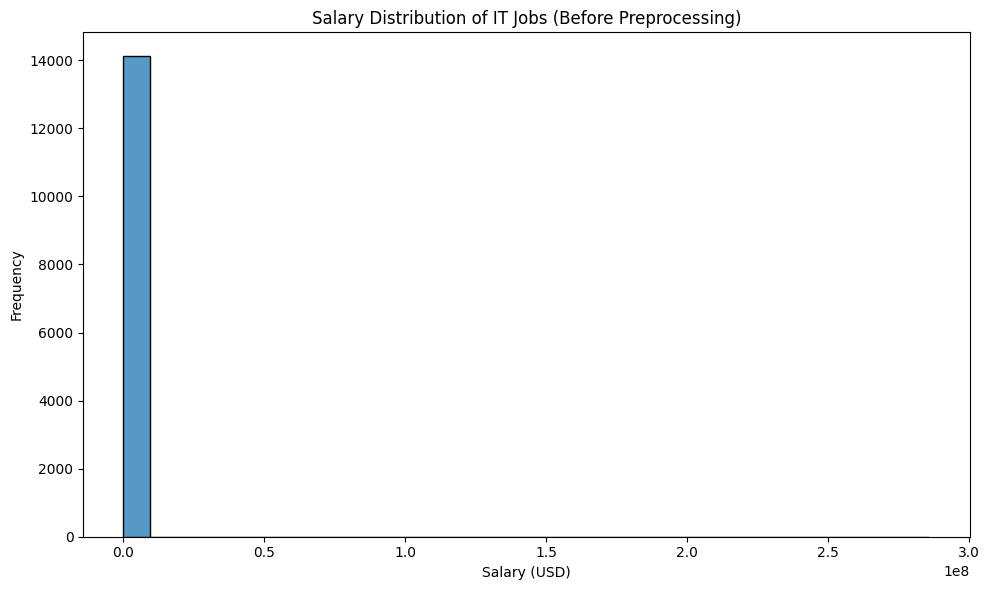

In [22]:
plt.figure(figsize=(10, 6))
df_salary_raw = df_it[df_it['normalized_salary'].notnull()]['normalized_salary']
sns.histplot(df_salary_raw, bins=30, color='#1f77b4')
plt.title("Salary Distribution of IT Jobs (Before Preprocessing)")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()